In [16]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import sqrt as Sqrt
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
def getQuadrForm(A, X):
    return sympy.simplify((X.transpose() * A * X)[0, 0])

In [57]:
def checkQuadrForm(A, X, u):
    return getQuadrForm(A, X) - u == 0

In [27]:
def getEigenVectBasis(A):
    T = Matrix([])

    for num, cnt, vectors in A.eigenvects():
        for vect in vectors:
            T = T.row_join(vect)
            
    return T

In [25]:
def toBasis(A, T):
    return T**(-1) * A * T

In [41]:
DEG = 0
RAD = 1
CW = 0
CCW = 1

def getRotationMatrix(alpha, unit=RAD, direction=CCW):
    global DEG, RAD, CW, CWW
    
    if direction == CW:
        alpha *= -1
        
    if unit == DEG:
        alpha = degToRad(alpha)
        
    return Matrix([
        [Cos(alpha), -Sin(alpha), 0],
        [Sin(alpha),  Cos(alpha), 0],
        [         0,           0, 1],
    ])

# Занятие 13
# Алгебра
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [59]:
x, y, z = symbols("x y z")
X = Matrix([x, y, z])
u = 7*x**2 + 10*Sqrt(3)*x*y - 3*y**2 - 20*z**2

A = Matrix([
    [ 7        , 5*Sqrt(3),   0],
    [ 5*Sqrt(3),        -3,   0],
    [         0,         0, -20],
])

display(checkQuadrForm(A, X, u), A.eigenvects())

True

[(-20,
  1,
  [Matrix([
   [0],
   [0],
   [1]])]),
 (-8,
  1,
  [Matrix([
   [-sqrt(3)/3],
   [         1],
   [         0]])]),
 (12,
  1,
  [Matrix([
   [sqrt(3)],
   [      1],
   [      0]])])]

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [60]:
T = getEigenVectBasis(A)
display(T, toBasis(A, T))

Matrix([
[0, -sqrt(3)/3, sqrt(3)],
[0,          1,       1],
[1,          0,       0]])

Matrix([
[-20,  0,  0],
[  0, -8,  0],
[  0,  0, 12]])

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

True

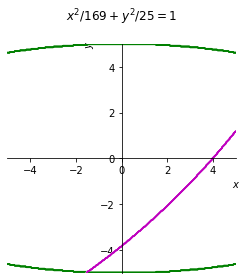

In [143]:
u = 97*x**2 - 144*x*y + 97*y**2 + 482*x - 532*y - 3452

A = Matrix([
    [97, -72, 241],
    [-72, 97, -266],
    [241, -266, -3452],
])

X = Matrix([x, y, 1])

display(checkQuadrForm(A, X, u))

alpha = sympy.acot((A[0,0]-A[1,1]) / (2*A[0,1]))/2
T = getRotationMatrix(alpha)
A = toBasis(A, T)

x1, y1 = symbols("x1 y1")
T = Matrix([x1 - A[0, 2] / A[0, 0], y1 - A[1, 2] / A[1, 1], 1])
newForm = getQuadrForm(A, T)
free = newForm.subs({x1: 0, y1: 0})
newForm /= -free

p = plot_implicit(
    newForm,    
    line_color='g',
    aspect_ratio=(1,1),
    xlabel='$x$',
    ylabel='$y$',
    title=latex(Eq(newForm.subs({x1: x, y1:y}) - free/abs(free), 1), mode='inline')+'\n',    
    adaptive=False,
    show=False
)
p.extend(plot_implicit(
    u,
    line_color='m',
    adaptive=False,
    show=False
))
p.show()

### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

True

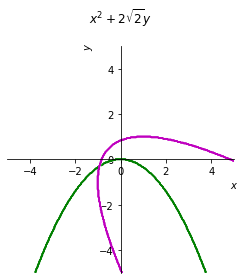

In [144]:
u = x**2 + 2*x*y + y**2 - 4*x + 4*y - 4

A = Matrix([
    [1, 1, -2],
    [1, 1, 2],
    [-2, 2, -4],
])

X = Matrix([x, y, 1])

display(checkQuadrForm(A, X, u))

alpha = sympy.acot((A[0,0]-A[1,1]) / (2*A[0,1]))/2
T = getRotationMatrix(alpha)
A = toBasis(A, T)

x1, y1 = symbols("x1 y1")
newForm = getQuadrForm(A, X) / 2 + 2

p = plot_implicit(
    newForm,    
    line_color='g',
    aspect_ratio=(1,1),
    xlabel='$x$',
    ylabel='$y$',
    title=latex(newForm, mode='inline')+'\n',
    adaptive=False,
    show=False
)
p.extend(plot_implicit(
    u,
    line_color='m',
    adaptive=False,
    show=False
))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

$$Q = 6186 x^{2} - 60 \sqrt{91} x y + 2564 \sqrt{21} x z - 5225 y^{2} + 210 \sqrt{39} y z - 4711 z^{2}$$

In [148]:
u = 6186*x**2 - 60*Sqrt(91)*x*y + 2564*Sqrt(21)*x*z - 5225*y**(2) + 210*Sqrt(39)*y*z - 4711*z**2

A = Matrix([
    [6186, -30*Sqrt(91), 1282*Sqrt(21)],
    [-30*Sqrt(91), -5225, 105*Sqrt(39)],
    [1282*Sqrt(21), 105*Sqrt(39), -4711],
])

x, y, z = symbols("x y z")
X = Matrix([x, y, z])

checkQuadrForm(A, X, u)
A_new = toBasis(A, getEigenVectBasis(A))

display(A, A_new, getQuadrForm(A_new, X))

Matrix([
[         6186, -30*sqrt(91), 1282*sqrt(21)],
[ -30*sqrt(91),        -5225,  105*sqrt(39)],
[1282*sqrt(21), 105*sqrt(39),         -4711]])

Matrix([
[-7500,     0,    0],
[    0, -5000,    0],
[    0,     0, 8750]])

-7500*x**2 - 5000*y**2 + 8750*z**2